In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv('CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv',sep = '|')

In [3]:
df1.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [4]:
df2 = pd.read_csv('CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv',sep='|')
df3 = pd.read_csv('CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv',sep='|')
df4 = pd.read_csv('CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv',sep='|')
df5 = pd.read_csv('CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv',sep='|')
df6 = pd.read_csv('CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv',sep='|')
df7 = pd.read_csv('CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv',sep='|')
df8 = pd.read_csv('CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv',sep='|')
df9 = pd.read_csv('CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv',sep='|')
df10 = pd.read_csv('CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv',sep='|')

C:\Users\Harshneel\AppData\Local\Temp\ipykernel_21244\291993118.py:7: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df8 = pd.read_csv('CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv',sep='|')


In [5]:
dff = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],axis = 0)

In [6]:
df = dff[:5000000]

In [7]:
del dff
del df1
del df2
del df3
del df4
del df5
del df6
del df7
del df8
del df9
del df10

In [8]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [9]:
df.replace('-', np.nan, inplace=True)

In [10]:
df.isnull().sum()

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service           4985873
duration          2803111
orig_bytes        2803111
resp_bytes        2803111
conn_state              0
local_orig        5000000
local_resp        5000000
missed_bytes            0
history             19399
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents    5000000
label                   0
detailed-label    4308919
dtype: int64

In [11]:
df.shape


(5000000, 23)

In [12]:
df['label'].unique()

array(['Malicious', 'Benign', 'Malicious   C&C',
       'Malicious   PartOfAHorizontalPortScan', 'Malicious   DDoS',
       'Malicious   Attack'], dtype=object)

In [13]:
df['service'].unique()

array([nan, 'http', 'dhcp', 'ssh', 'dns', 'irc'], dtype=object)

In [14]:
df['history'].unique()

array(['S', 'Sr', 'D', 'Dd', nan, 'R', 'ShAdaFr', 'ShAfFa', 'ShAdfFa',
       'ShAF', '^r', 'ShADadfR', 'ShA', 'ShADr', 'ShADFr', 'ShAdDafF',
       'ShAr', 'ShADafr', 'ShADarfF', 'ShAFr', 'ShAdDaFf', 'ShAdDaTFf',
       'ShADF', 'ShAdDaTF', 'SaR', 'ShAdDtafF', 'ShADadRf', 'ShAdDaFr',
       'ShAdDaFRf', 'ShADadfF', 'ShADFadfRR', 'ShADafF', 'ShAdDatFf',
       'ShADadR', 'ShAdtDaFrR', 'ShAdDatFr', 'ShAdtDaFr', 'ShAdDatFrR',
       'ShAdDaFrR', 'ShAdDatfF', 'D^', 'ShADdfFa', 'ShAdDfFr',
       'ShAdDafFr', 'ShADrfR', 'ShADdafR', 'ShAFf', 'ShADaF', 'ShAFa',
       'ShAdDaF', 'ShAdF', 'ShAdDafrR', 'ShAdDafFrR', 'ShADfdtR',
       'ShAdDarfR', 'SahAdDrfR', 'Fr', 'ShAdDatrfR', 'ShADar', 'ShAdDr',
       'HaDdR', 'ShADadFf', 'ShAdDaTfF', 'ShAdDTafF', 'ShAdDaTFfR',
       'ShAdDaftF', 'ShAdFaf', 'ShAFfR', 'ShAdDafrFr', 'ShADfFr',
       'ShADfrFr', 'ShrA', 'F', 'ShADafdtF', 'ShAdr', 'ShAdDtaFr',
       'ShAdDFar', 'ShAdDarr', 'ShAdDaFfr', 'HaDdAfF', 'ShAdDaFfR',
       'HaFfA', 'ShAdDafFR', '

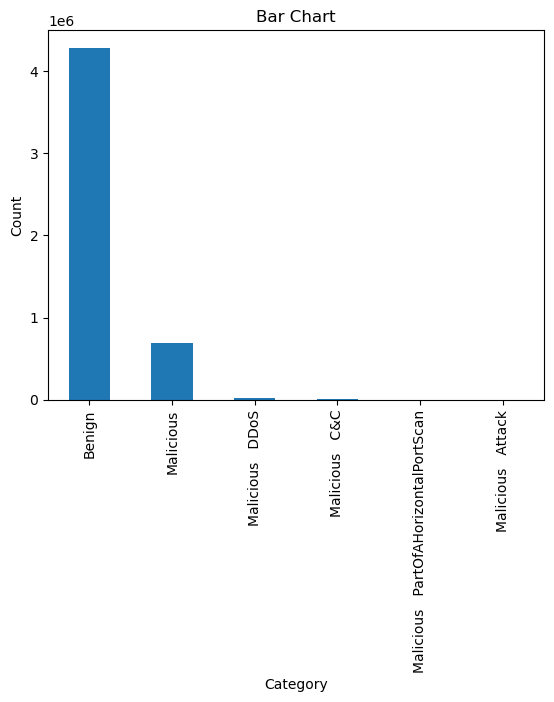

In [15]:
df['label'].value_counts().plot(kind = 'bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart')

plt.show()

In [16]:
data = df['service'].value_counts()

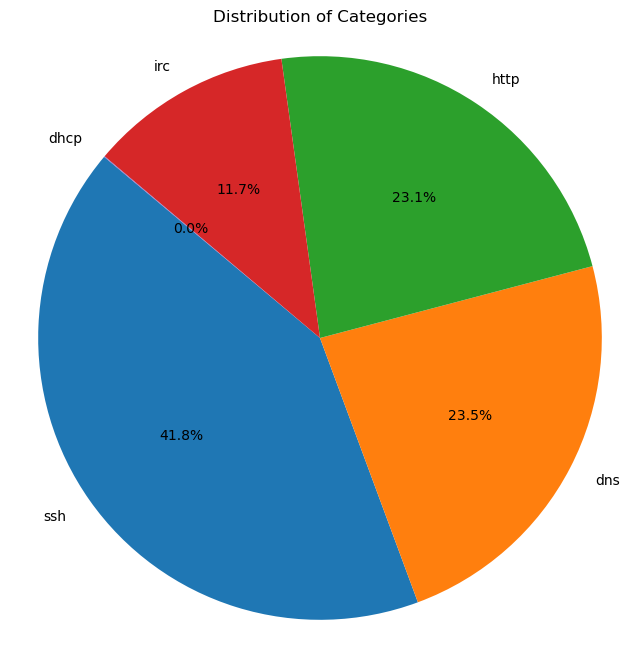

In [17]:
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [19]:
df = pd.get_dummies(data = df, columns=['proto', 'conn_state', 'service'],drop_first=True)
df['history'] = pd.factorize(df['history'])[0] + 1


In [20]:
df['duration'] = df['duration'].astype('float')
df['orig_bytes'] = df['orig_bytes'].astype('float')
df['resp_bytes'] = df['resp_bytes'].astype('float')

In [22]:
desired_value = 'Benign'

df['label'] = [1 if x == desired_value else 0 for x in df['label']]



In [23]:
df['label'].sample(25)

2056640    1
3216179    1
3783506    1
726730     0
1168707    1
46557      0
1633575    1
2688990    1
1954778    1
3181776    1
770992     1
1809116    1
3586074    1
1829208    1
769749     1
2536439    1
1507804    1
2147017    1
2424476    1
2301332    1
1005569    1
1770770    1
2949138    1
3324160    1
2759823    1
Name: label, dtype: int64

In [24]:
df = df.drop(columns=['uid', 'local_orig', 'local_resp', 'tunnel_parents', 'detailed-label', 'id.orig_h', 'id.resp_h'])

In [25]:
df = df.fillna(0)

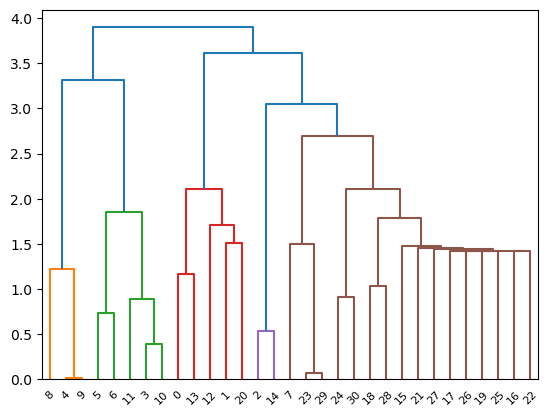

In [26]:
import scipy.cluster.hierarchy as sch

correlation_matrix = df.corr()
dendrogram = sch.dendrogram(sch.linkage(correlation_matrix, method='ward'))
plt.show()
